In [14]:
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [35]:
import pymc as pc
delta = 0.5
mu = 10.
lmb = pc.Gamma('lmb', alpha=delta, beta=delta/mu)
Y = pc.Poisson('Y', mu=lmb)

In [36]:
m = pc.Model([mu, lmb, Y])

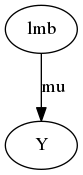

In [37]:
viewPydot(pc.graph.dag(m))

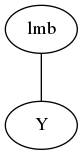

In [39]:
viewPydot(pc.graph.moral_graph(m))

In [74]:
import numpy as np
import random as rn
K = 2

V = 2
   
D = 1
   
#array([1, 1, 1, ..., 1]) K times  
alpha = np.ones(K)  
   
#array([1, 1, 1, ..., 1]) V times  
beta = np.ones(V)  
   
#array containing the information about doc length in our collection  
Nd = [2]  

#word distribution for each topic  
phi = pc.Container([pc.CompletedDirichlet("mu_%i" % k,   
                      pc.Dirichlet("alpha_%i" % k, theta=beta))  
           for k in range(K)])  
   
#topic distribution in the collection  
theta = pc.CompletedDirichlet("pi",   
                               pc.Dirichlet("alpha", theta=alpha))  
   
#for each document, draw a topic z_m  
z = pc.Container([pc.Categorical("y_%i" % d,  
                                  p = theta,  
                                  value = rn.randint(0,K-1))  
                  for d in range(D)])  
   
#for each document, draw words, based on topic z_m  
w = pc.Container([pc.Categorical("x_%i_%i" % (d,i),  
                                  p = pc.Lambda("_",
                                                lambda z=z[d], phi=phi : phi[z]),  
                                  #value=collection[d][i],  
                                  observed=False)  
                  for d in range(D) for i in range(Nd[d])])  
   

model = pc.Model([theta, phi, z, w])  

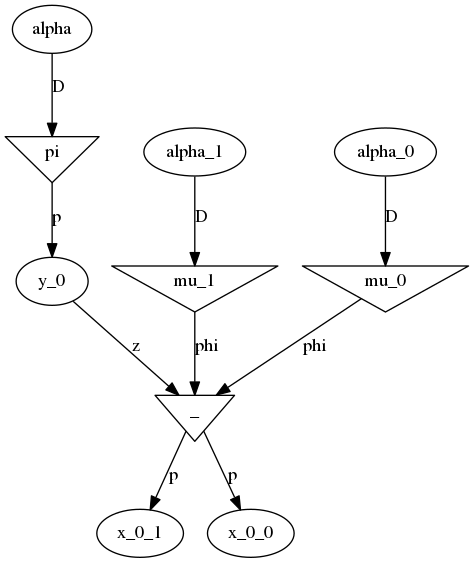

In [75]:
viewPydot(mc.graph.dag(model))